## Cardio Fitness dataset

https://www.kaggle.com/datasets/serkanp/cardio-fitness

To be performed:
- Basic data analysis
- EDA
- Classification ML with RFE, GridSearchCV and KFold

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [444]:
file = 'CardioGoodFitness-1.csv'

In [530]:
df = pd.read_csv(file)

# BASIC DATA ANALYSIS

In [531]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [533]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [18]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [19]:
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [20]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [21]:
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [22]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [23]:
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [31]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

### __Data types:__

There are 180 data lines, no NAN value.

I consider two numerical features:
- Income
- Miles

, and 7 categorical features:
- Product
- Age
- Gender
- Education (? there is no information whether this is categorial, or continous e.g. n. of years)
- MaritalStatus
- Usage
- Fitness

# EDA

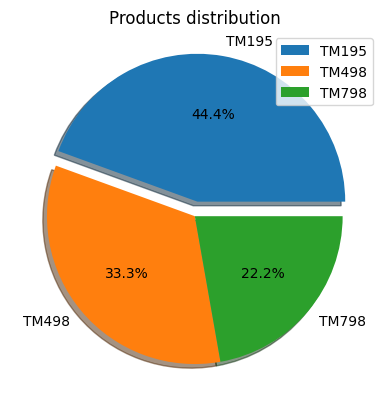

In [98]:
plt.pie(df['Product'].value_counts(), labels=df['Product'].unique(), explode = [0.1, 0.0, 0.0], shadow=True, autopct='%1.1f%%')
plt.title("Products distribution")
plt.legend()
plt.show()

There are 3 types of product, whereas one of them TM195 has 44,4% presence within dataset.

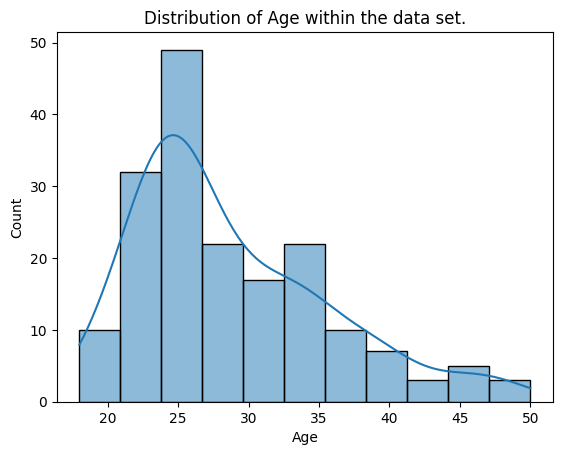

In [140]:
sns.color_palette("mako", as_cmap=True)
sns.histplot(df['Age'], kde= True)
plt.title('Distribution of Age within the data set.')
plt.show()

In [97]:
df['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

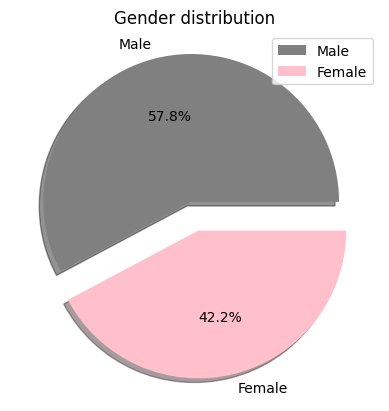

In [89]:
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].unique(), explode = [0.1, 0.1], shadow=True, colors=['gray', 'pink'], autopct='%1.1f%%')
plt.title("Gender distribution")
plt.legend()
plt.show()

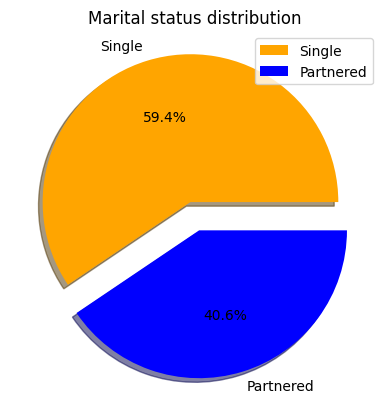

In [90]:
plt.pie(df['MaritalStatus'].value_counts(), labels=df['MaritalStatus'].unique(), explode = [0.1, 0.1], shadow=True, colors = ['orange', 'blue'], autopct='%1.1f%%')
plt.title("Marital status distribution")
plt.legend()
plt.show()

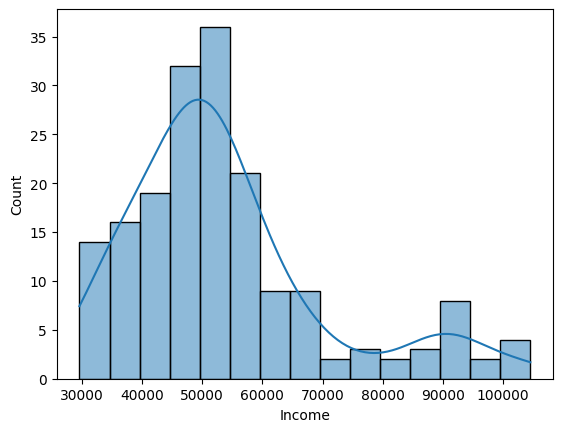

In [93]:
sns.histplot(df['Income'], kde=True)
plt.show()

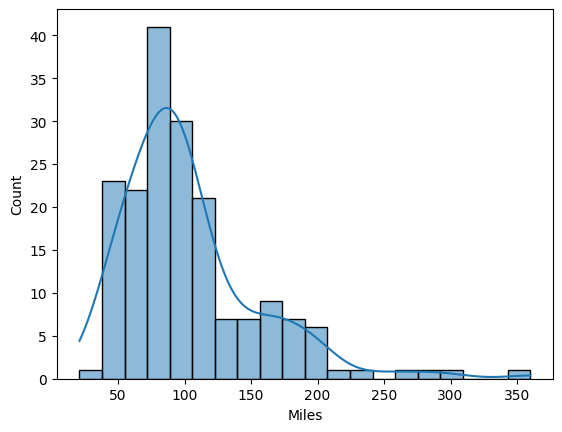

In [94]:
sns.histplot(df['Miles'], kde=True)
plt.show()

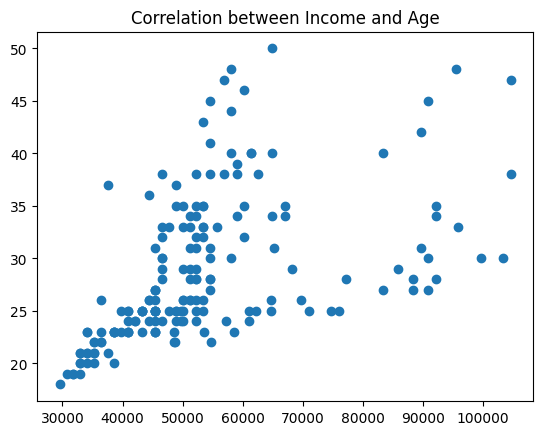

Pearsons correlation: 0.51


In [153]:
from scipy.stats import pearsonr
plt.scatter(x=df['Income'], y=df['Age'])
plt.title('Correlation between Income and Age')
plt.show()
corr, _ = pearsonr(df['Income'], df['Age'])
print(f'Pearsons correlation: {corr:.2f}')

Text(0.5, 1.0, 'Display of all products against miles run.')

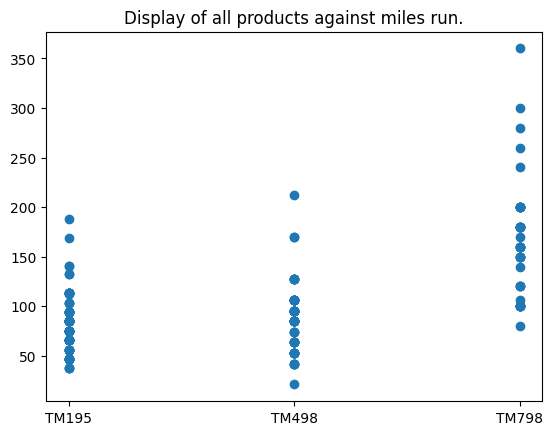

In [187]:
plt.scatter(x=df['Product'], y=df['Miles'])
plt.title('Display of all products against miles run.')

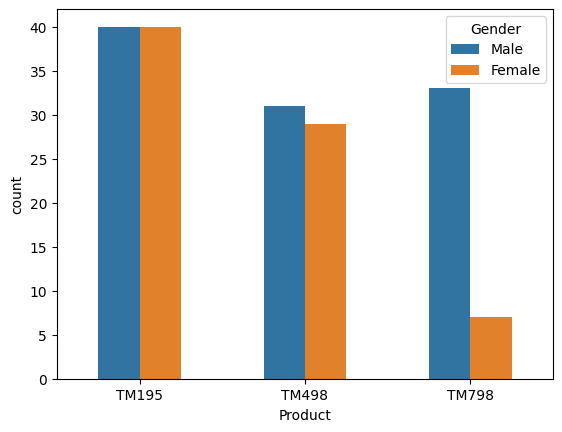

In [170]:
sns.countplot(x="Product", hue="Gender", data=df, width=0.5)
plt.show()

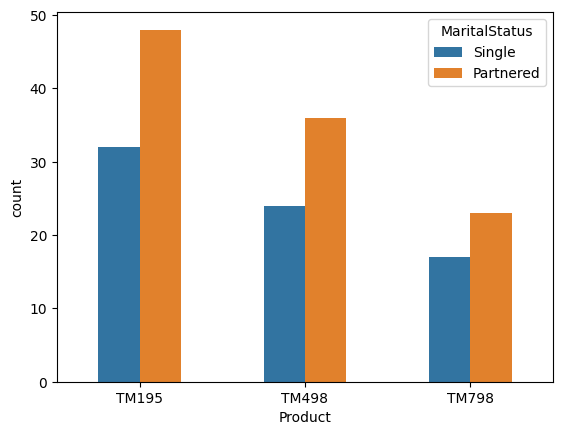

In [171]:
sns.countplot(x="Product", hue="MaritalStatus", data=df, width = 0.5)
plt.show()

In [193]:
pd.pivot_table(df, index=['Product', 'Gender'],aggfunc='mean')

Age  Education   Fitness        Income       Miles  \
Product Gender                                                             
TM195   Female  28.450000  15.100000  2.875000  46020.075000   76.200000   
        Male    28.650000  14.975000  3.050000  46815.975000   89.375000   
TM498   Female  29.103448  15.206897  2.862069  49336.448276   87.344828   
        Male    28.709677  15.032258  2.935484  48634.258065   88.483871   
TM798   Female  27.000000  17.857143  4.571429  73633.857143  180.000000   
        Male    29.545455  17.212121  4.636364  75825.030303  164.121212   

                   Usage  
Product Gender            
TM195   Female  2.900000  
        Male    3.275000  
TM498   Female  3.137931  
        Male    3.000000  
TM798   Female  5.000000  
        Male    4.727273

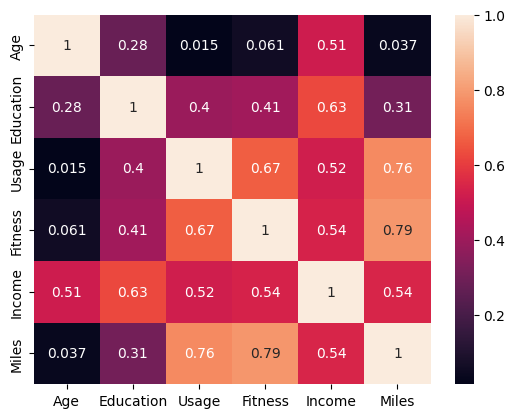

In [186]:
sns.heatmap(df.corr(), annot = True)
plt.show()

The highest positive correlation is:
- Usage and miles run 0.76
- Fitness level and mile run 0.79

As we can see, the highest correlation is Fitness level, Usage and Income, however as we have very small dataset, not many features and Sklearn can help us, I am going to use Feature selection (RFE).
Steps pipeline:
- split data into test/train
- perform first check with various models
- chose the most precise model
- perform training with K fold, GridSearch and RFE

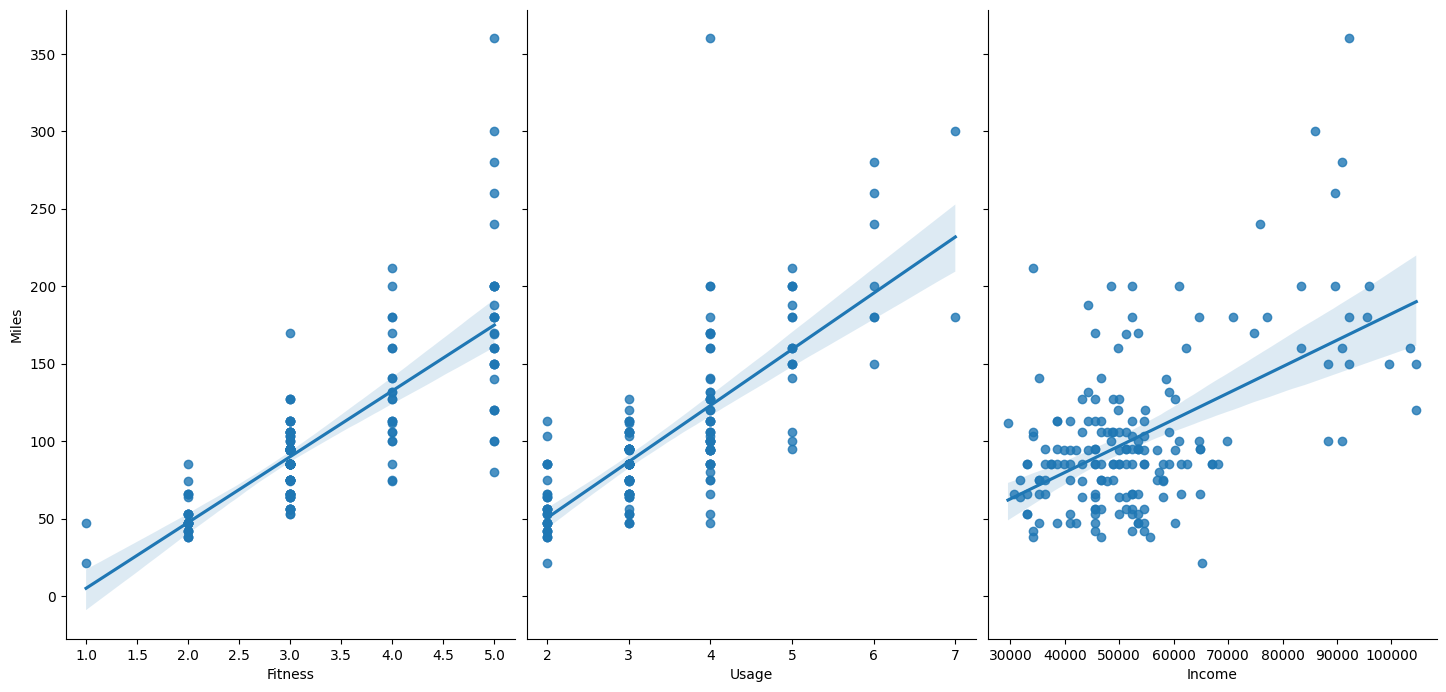

In [406]:
sns.pairplot(df, x_vars=['Fitness', 'Usage', 'Income'], y_vars=['Miles'], height=7, aspect=0.7, kind='reg')
plt.show()

In [534]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [637]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [590]:
X_values_dummies = pd.get_dummies(df[['Product', 'Gender', 'MaritalStatus']])

In [601]:
df_ML = pd.concat([df, X_values_dummies], axis = 1)

In [602]:
df_ML.drop(['Product', 'Gender', 'MaritalStatus'], axis = 1, inplace = True)

In [603]:
df_ML.head()

,Age,Education,Usage,Fitness,Income,Miles,Product_TM195,Product_TM498,Product_TM798,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single
0,18,14,3,4,29562,112,1,0,0,0,1,0,1
1,19,15,2,3,31836,75,1,0,0,0,1,0,1
2,19,14,4,3,30699,66,1,0,0,1,0,1,0
3,19,12,3,3,32973,85,1,0,0,0,1,0,1
4,20,13,4,2,35247,47,1,0,0,0,1,1,0


In [670]:
train, test = train_test_split(df_ML, test_size=0.2,random_state=0)

In [671]:
scaler = MinMaxScaler()

numeric = ['Age', "Education", 'Usage', 'Fitness', 'Income', 'Miles']

train[numeric] = scaler.fit_transform(train[numeric])
train.head()

,Age,Education,Usage,Fitness,Income,Miles,Product_TM195,Product_TM498,Product_TM798,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single
55,0.40625,0.222222,0.0,0.25,0.333436,0.076696,1,0,0,0,1,1,0
83,0.06250,0.222222,0.2,0.50,0.121249,0.218289,0,1,0,0,1,0,1
45,0.31250,0.444444,0.0,0.50,0.303123,0.132743,1,0,0,1,0,1,0
163,0.31250,0.666667,1.0,1.00,0.634892,0.469027,0,0,1,0,1,1,0
123,0.46875,0.444444,0.6,0.50,0.318279,0.218289,0,1,0,1,0,1,0


In [672]:
test[numeric] = scaler.transform(test[numeric])
test.head()

,Age,Education,Usage,Fitness,Income,Miles,Product_TM195,Product_TM498,Product_TM798,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single
106,0.21875,0.222222,0.0,0.25,0.212186,0.061947,0,1,0,1,0,0,1
7,0.09375,0.111111,0.2,0.50,0.045468,0.188791,1,0,0,0,1,0,1
125,0.50000,0.444444,0.4,0.50,0.469841,0.218289,0,1,0,1,0,1,0
160,0.28125,0.666667,0.4,0.50,0.784255,0.233038,0,0,1,0,1,0,1
136,0.68750,0.444444,0.2,0.50,0.378904,0.188791,0,1,0,1,0,0,1


In [607]:
y_train = train['Miles']
X_train = train.drop("Miles", axis=1)

y_test = test['Miles']
X_test = test.drop('Miles', axis=1)

In [608]:
X_train

,Age,Education,Usage,Fitness,Income,Product_TM195,Product_TM498,Product_TM798,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single
55,0.40625,0.222222,0.0,0.25,0.333436,1,0,0,0,1,1,0
83,0.06250,0.222222,0.2,0.50,0.121249,0,1,0,0,1,0,1
45,0.31250,0.444444,0.0,0.50,0.303123,1,0,0,1,0,1,0
163,0.31250,0.666667,1.0,1.00,0.634892,0,0,1,0,1,1,0
123,0.46875,0.444444,0.6,0.50,0.318279,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.21875,0.222222,0.4,0.50,0.212186,0,1,0,0,1,1,0
67,0.59375,0.444444,0.2,0.50,0.106093,1,0,0,1,0,1,0
117,0.40625,0.666667,0.0,0.00,0.475320,0,1,0,1,0,0,1
47,0.31250,0.222222,0.2,0.50,0.333436,1,0,0,1,0,1,0


In [609]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [610]:
X_train.shape, X_test.shape

((144, 12), (36, 12))

In [611]:
y_train, y_test

(array([0.07669617, 0.21828909, 0.13274336, 0.46902655, 0.21828909,
        0.27138643, 0.18879056, 0.25073746, 0.18879056, 0.12684366,
        0.05014749, 0.21828909, 0.25073746, 0.23303835, 0.24188791,
        0.05014749, 0.70501475, 0.18879056, 0.18879056, 0.24188791,
        0.21533923, 0.25073746, 0.09439528, 0.09439528, 0.25073746,
        0.31268437, 0.12684366, 0.15929204, 0.18879056, 0.23303835,
        0.12684366, 0.5280236 , 0.21828909, 0.13274336, 0.13274336,
        0.05014749, 0.18879056, 0.31268437, 0.10324484, 0.18879056,
        0.09439528, 0.13274336, 1.        , 0.23303835, 0.21828909,
        0.0619469 , 0.12684366, 0.2920354 , 0.46902655, 0.18879056,
        0.4100295 , 0.31268437, 0.21533923, 0.15634218, 0.18879056,
        0.10324484, 0.10324484, 0.27138643, 0.0619469 , 0.15929204,
        0.18879056, 0.49262537, 0.7640118 , 0.27138643, 0.15929204,
        0.21533923, 0.21533923, 0.25073746, 0.15929204, 0.18879056,
        0.2920354 , 0.31268437, 0.15929204, 0.15

In [612]:
models_list = [LinearRegression(), 
               BayesianRidge(),
               SGDRegressor(),
               KernelRidge(),
               #GradientBoostingRegressor()
              ]

In [613]:
def first_check(model):
    score = []
    
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
        
    score = model.score(X_test, y_test)
    
    return score
    
    

In [614]:
temp_results = []

for model in models_list:
    x = first_check(model)
    temp_results.append(x)

In [615]:
df_results = pd.DataFrame(models_list,temp_results)

In [616]:
df_results

,0
0.794509,LinearRegression()
0.796415,BayesianRidge()
0.568581,SGDRegressor()
0.789985,KernelRidge()


Quite good score, but I will choose Standard Linear Regression to go further on, so let's tweak this one with K_fold and Grid Search for the best parameters.

In [619]:
X_train.shape

(144, 12)

We have 12 features to go with.

In [620]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 12)
rfe = rfe.fit(X_train, y_train)

In [626]:
list(zip(test.columns, rfe.support_,rfe.ranking_))

[('Age', True, 1),
 ('Education', True, 1),
 ('Usage', True, 1),
 ('Fitness', True, 1),
 ('Income', True, 1),
 ('Miles', True, 1),
 ('Product_TM195', True, 1),
 ('Product_TM498', True, 1),
 ('Product_TM798', True, 1),
 ('Gender_Female', True, 1),
 ('Gender_Male', True, 1),
 ('MaritalStatus_Partnered', True, 1)]

In [627]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)


hyper_params = [{'n_features_to_select': list(range(1, 12))}]


lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11]}],
             return_train_score=True, scoring='r2', verbose=1)

In [628]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014525,0.001772,0.000400,0.000490,1,{'n_features_to_select': 1},0.482970,0.320613,0.449078,0.768075,...,0.506912,0.146205,11,0.619519,0.643320,0.567927,0.554093,0.610901,0.599152,0.033193
1,0.009966,0.000893,0.000199,0.000398,2,{'n_features_to_select': 2},0.694695,0.542883,0.606223,0.904334,...,0.687917,0.122150,3,0.693718,0.748886,0.708050,0.646797,0.696982,0.698887,0.032642
2,0.008384,0.000496,0.000591,0.000483,3,{'n_features_to_select': 3},0.677304,0.543488,0.577215,0.887029,...,0.674924,0.120026,10,0.697098,0.753856,0.717437,0.654140,0.701621,0.704830,0.032255
3,0.008179,0.000964,0.000399,0.000489,4,{'n_features_to_select': 4},0.686540,0.563069,0.618159,0.882712,...,0.693159,0.108640,1,0.698695,0.766506,0.725926,0.671299,0.712606,0.715006,0.031476
4,0.007373,0.001358,0.000199,0.000398,5,{'n_features_to_select': 5},0.686540,0.571834,0.602094,0.881003,...,0.688977,0.108037,2,0.698695,0.772385,0.728029,0.679364,0.722762,0.720247,0.031373
5,0.006166,0.000409,0.000000,0.000000,6,{'n_features_to_select': 6},0.682047,0.553943,0.608456,0.867355,...,0.679125,0.105949,5,0.705277,0.777815,0.729779,0.683731,0.728138,0.724948,0.031351
6,0.005192,0.000381,0.000399,0.000488,7,{'n_features_to_select': 7},0.686669,0.555888,0.609671,0.860302,...,0.677282,0.102863,9,0.707488,0.779730,0.730269,0.687812,0.732821,0.727624,0.030788
7,0.005307,0.001357,0.000797,0.000399,8,{'n_features_to_select': 8},0.694274,0.557390,0.617473,0.859154,...,0.679124,0.101390,7,0.707900,0.780602,0.730649,0.689154,0.734845,0.728630,0.030763
8,0.003751,0.000700,0.000200,0.000400,9,{'n_features_to_select': 9},0.694274,0.557390,0.617473,0.859154,...,0.679124,0.101390,6,0.707900,0.780602,0.730649,0.689154,0.734845,0.728630,0.030763
9,0.002589,0.000457,0.000402,0.000494,10,{'n_features_to_select': 10},0.694274,0.557390,0.617473,0.859154,...,0.678850,0.101423,8,0.707900,0.780602,0.730649,0.689154,0.734956,0.728652,0.030768


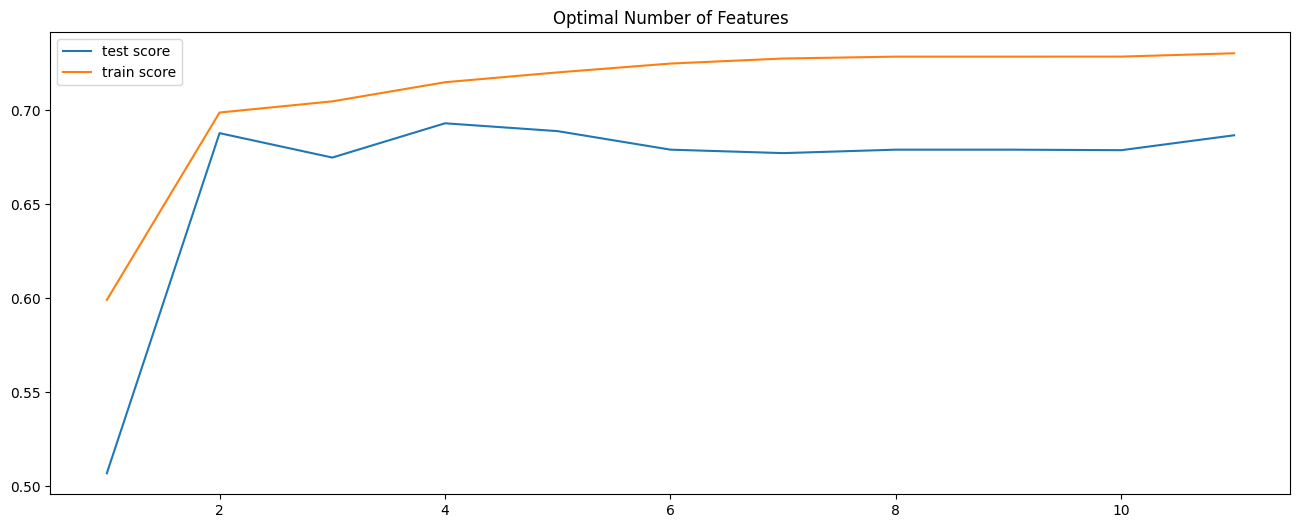

In [634]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
# plt.xlabel('number of features')
# plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

https://statisticsbyjim.com/regression/interpret-r-squared-regression/

R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values.

R-squared is the percentage of the dependent variable variation that a linear model explains.

R-squared is always between 0 and 100%:

0% represents a model that does not explain any of the variation in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.
100% represents a model that explains all the variation in the response variable around its mean.
Usually, the larger the R2, the better the regression model fits your observations. 

In [642]:
n_features_optimal = 11

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

y_pred = lm.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.7945090397865213


The final value 0.79 is quite good result in interval <0,1> .

In [645]:
df_ML.head()

,Age,Education,Usage,Fitness,Income,Miles,Product_TM195,Product_TM498,Product_TM798,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single
0,18,14,3,4,29562,112,1,0,0,0,1,0,1
1,19,15,2,3,31836,75,1,0,0,0,1,0,1
2,19,14,4,3,30699,66,1,0,0,1,0,1,0
3,19,12,3,3,32973,85,1,0,0,0,1,0,1
4,20,13,4,2,35247,47,1,0,0,0,1,1,0


## Prediction of real case

In [884]:
values_to_predict = {'Age': 20,
                    'Education': 15,
                    'Usage': 0,
                    'Fitness': 2,
                    'Income': 30000,
                    'Miles':0,            # put here only in order to respect already fitted scaler, to be removed!
                    'Product_TM195': 0,
                    'Product_TM498': 0,
                    'Product_TM798': 0,
                    'Gender_Female': 0,
                    'Gender_Male': 1,
                    'MaritalStatus_Partnered': 0,
                    'MaritalStatus_Single': 1}


df_predict = pd.DataFrame([values_to_predict])

df_predict.head()

,Age,Education,Usage,Fitness,Income,Miles,Product_TM195,Product_TM498,Product_TM798,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single
0,20,15,0,2,30000,0,0,0,0,0,1,0,1


In [885]:
numeric_predict = ['Age', "Education", 'Usage', 'Fitness', 'Income', 'Miles']

df_predict[numeric_predict] = scaler.transform(df_predict[numeric_predict])
df_predict[numeric_predict].head()

,Age,Education,Usage,Fitness,Income,Miles
0,0.0625,0.333333,-0.4,0.25,0.005839,-0.061947


In [886]:
df_predict.pop('Miles')

0   -0.061947
Name: Miles, dtype: float64

In [887]:
df_predict.head()

,Age,Education,Usage,Fitness,Income,Product_TM195,Product_TM498,Product_TM798,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single
0,0.0625,0.333333,-0.4,0.25,0.005839,0,0,0,0,1,0,1


In [888]:
df_predict = np.array(df_predict)
predicted = lm.predict(df_predict)

In [889]:
predicted       # scaled value to be unscaled by means of inverse_transform

array([-0.09018594])

In [890]:
unscale = {'Age': 0,
                    'Education': 0,
                    'Usage': 0,
                    'Fitness': 0,
                    'Income': 0,
                    'Miles': predicted,            # put here only in order to respect already fitted scaler, to be removed!
                    'Product_TM195': 0,
                    'Product_TM498': 0,
                    'Product_TM798': 0,
                    'Gender_Female': 0,
                    'Gender_Male': 0,
                    'MaritalStatus_Partnered': 0,
                    'MaritalStatus_Single': 0}

numeric_unscale = ['Age', "Education", 'Usage', 'Fitness', 'Income', 'Miles']

In [891]:
df_unscale = pd.DataFrame([unscale])

In [892]:
miles_predicted = scaler.inverse_transform(df_unscale[numeric_unscale])

In [893]:
if int(miles_predicted[0][5]) > 0 :
    print(f'Based on given assumptions, the expected volume of running is {miles_predicted[0][5]:.02f} miles a month.')
else:
    print(f'Based on given assumptions, the expected volume of running is around 0 miles a month.')

Based on given assumptions, the expected volume of running is around 0 miles a month.
